In [2]:
# import libraries

import pandas as pd
import requests
import time
import numpy as np
from scipy.stats import linregress
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime


In [3]:
# read raw csv files
raw_seated_diners = pd.read_csv('input_data/YoY_Seated_Diner_Data.csv')

raw_state_cases = pd.read_csv('input_data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

raw_country_cases = pd.read_csv('input_data/case_daily_trends__united_states.csv',skiprows =3)

#confirm that rows were skipped on upload
raw_country_cases

,Date,New Cases,7-Day Moving Avg
0,Feb 9 2021,91034,107632
1,Feb 8 2021,86706,111329
2,Feb 7 2021,91762,116904
3,Feb 6 2021,107489,119906
4,Feb 5 2021,130261,124773
...,...,...,...
380,Jan 26 2020,3,0
381,Jan 25 2020,0,0
382,Jan 24 2020,1,0
383,Jan 23 2020,0,0


In [4]:
# sort raw country cases to align dates to later merge on index

raw_country_cases['Date'] = pd.to_datetime(raw_country_cases['Date'])

sorted_country_cases = raw_country_cases.sort_values(by = ['Date'], ascending = True)

sorted_country_cases

,Date,New Cases,7-Day Moving Avg
384,2020-01-22,1,0
383,2020-01-23,0,0
382,2020-01-24,1,0
381,2020-01-25,0,0
380,2020-01-26,3,0
...,...,...,...
4,2021-02-05,130261,124773
3,2021-02-06,107489,119906
2,2021-02-07,91762,116904
1,2021-02-08,86706,111329


In [5]:
# drop rows with mismatched dates and reset index

sorted_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases = sorted_country_cases.drop(sorted_country_cases.index[0:27])

slim_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases


,Date,New Cases,7-Day Moving Avg
0,2020-02-18,0,0
1,2020-02-19,0,0
2,2020-02-20,0,0
3,2020-02-21,2,0
4,2020-02-22,0,0
...,...,...,...
353,2021-02-05,130261,124773
354,2021-02-06,107489,119906
355,2021-02-07,91762,116904
356,2021-02-08,86706,111329


In [6]:
# create OpenTable country df
seated_diners_country = raw_seated_diners.loc[raw_seated_diners["Type"]=="country"]

seated_diners_country

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,31-Jan,1-Feb,2-Feb,3-Feb,4-Feb,5-Feb,6-Feb,7-Feb,8-Feb,9-Feb
0,country,Global,-1.0,3.0,-1.0,-2.0,1.0,4.0,1.0,1.0,...,-36.78,-65.67,-65.19,-61.28,-57.32,-49.00,-47.01,-66.89,-60.98,-62.57
1,country,Australia,-3.0,-6.0,-3.0,-1.0,0.0,0.0,0.0,-2.0,...,83.31,39.50,49.74,61.33,72.21,77.40,95.85,100.09,72.52,56.08
2,country,Canada,-5.0,0.0,-3.0,-2.0,-1.0,8.0,-2.0,-3.0,...,-77.49,-83.83,-85.02,-83.07,-85.27,-79.97,-80.54,-80.18,-72.28,-76.22
3,country,Germany,11.0,4.0,3.0,5.0,1.0,2.0,11.0,4.0,...,-99.62,-99.75,-99.72,-99.67,-99.59,-99.42,-99.19,-99.75,-99.92,-99.48
4,country,Ireland,2.0,0.0,4.0,1.0,-3.0,4.0,-9.0,-8.0,...,-99.84,-100.00,-100.00,-100.00,-99.91,-99.83,-99.16,-99.93,-99.89,-99.98
5,country,Mexico,-5.0,-5.0,-4.0,-3.0,-1.0,2.0,-1.0,-3.0,...,-46.38,-54.53,-61.39,-64.40,-62.66,-57.15,-52.77,-68.10,-60.25,-60.22
6,country,United Kingdom,1.0,-1.0,-2.0,0.0,-1.0,-4.0,-6.0,-5.0,...,-99.76,-99.83,-99.83,-99.90,-99.88,-99.73,-99.63,-99.78,-99.81,-99.80
7,country,United States,0.0,4.0,0.0,-1.0,2.0,6.0,2.0,2.0,...,-23.52,-62.56,-61.23,-56.66,-51.62,-43.02,-41.57,-65.83,-57.92,-59.32


In [7]:
# filter to U.S. only

seated_diners_us = seated_diners_country.loc[seated_diners_country['Name']=='United States']

seated_diners_us_slim = seated_diners_us.drop(columns = ['Type','Name'])

# transpose the df to be joined

flipped_us = seated_diners_us_slim.transpose()

final_us = flipped_us.reset_index()

final_us.rename(columns={'index': 'Date', 7: 'Percent Change in Seated Diners'}, inplace=True)

final_us



,Date,Percent Change in Seated Diners
0,18-Feb,0.00
1,19-Feb,4.00
2,20-Feb,0.00
3,21-Feb,-1.00
4,22-Feb,2.00
...,...,...
353,5-Feb,-43.02
354,6-Feb,-41.57
355,7-Feb,-65.83
356,8-Feb,-57.92


In [8]:
# merge the two data frames by index to line up dates
combined_df = pd.merge(slim_country_cases, final_us, left_index=True, right_index=True, how = 'outer')

combined_df

,Date_x,New Cases,7-Day Moving Avg,Date_y,Percent Change in Seated Diners
0,2020-02-18,0,0,18-Feb,0.00
1,2020-02-19,0,0,19-Feb,4.00
2,2020-02-20,0,0,20-Feb,0.00
3,2020-02-21,2,0,21-Feb,-1.00
4,2020-02-22,0,0,22-Feb,2.00
...,...,...,...,...,...
353,2021-02-05,130261,124773,5-Feb,-43.02
354,2021-02-06,107489,119906,6-Feb,-41.57
355,2021-02-07,91762,116904,7-Feb,-65.83
356,2021-02-08,86706,111329,8-Feb,-57.92


In [9]:
# remove the date_y column (not fomatted as date since year was not included)
slim_combined_df = combined_df.drop(columns=['Date_y'])

# rename the remaining date column and label the case column as cases
slim_combined_df2 = slim_combined_df.rename(columns = {'Date_x': 'Date','7-Day Moving Avg':'7-Day Moving Avg Cases'})

# drop rows to start data at March 1 (first month of COVID impact)
final_combined_df = slim_combined_df2.drop(slim_combined_df2.index[0:12])

# reset the index
final_combined_df.reset_index(inplace=True, drop = True)

#create final dataframe
final_combined_df

,Date,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners
0,2020-03-01,6,2,2.00
1,2020-03-02,25,6,-7.00
2,2020-03-03,24,9,-9.00
3,2020-03-04,22,12,-5.00
4,2020-03-05,62,21,-5.00
...,...,...,...,...
341,2021-02-05,130261,124773,-43.02
342,2021-02-06,107489,119906,-41.57
343,2021-02-07,91762,116904,-65.83
344,2021-02-08,86706,111329,-57.92


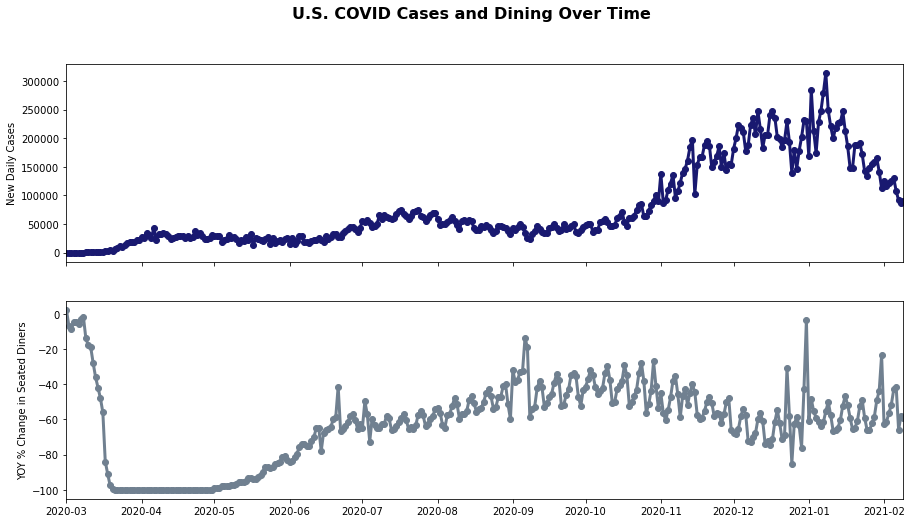

In [102]:
# create variables for data lists
cases = final_combined_df['New Cases']
date =  final_combined_df['Date']
diners = final_combined_df['Percent Change in Seated Diners']

# Generate a facet plot of figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(15, 8))

fig.suptitle("U.S. COVID Cases and Dining Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=3, marker="o", color = "midnightblue")
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=3, marker="o", color="slategrey")

ax2.set_ylabel("YOY % Change in Seated Diners")
fig.savefig("output_images/U.S. COVID Cases and Dining Over Time.png")


In [11]:
# correlation of the national metrics for the entire data set

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(cases, diners)

tot_r

0.1768632532224864

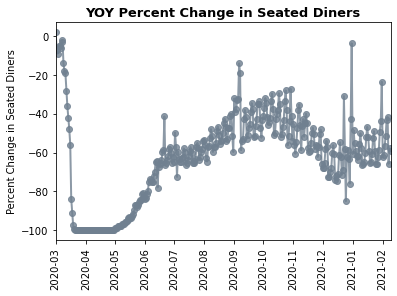

In [161]:
# create a visual of just OpenTable data

plt.plot(date,diners,linewidth = 2,color="slategrey",marker = 'o',alpha=0.8)
plt.xlim(min(date),max(date))
plt.xticks(rotation = "vertical")
plt.ylabel("Percent Change in Seated Diners")
plt.title("YOY Percent Change in Seated Diners",fontsize=13, fontweight="bold")
plt.savefig("output_images/YOY Percent Change in Seated Diners.png",bbox_inches="tight")

plt.show()


In [12]:
# group dining data and case date by week in averages

# name a new df to avoid modifying final_combined_df
grouped_df = final_combined_df

# create a field for the week ending Saturday for a given date, and group by average
df = grouped_df.groupby(['Date', pd.Grouper(key='Date', freq='W-SAT')]).mean()

# reset the index to remove duplicate index
df.reset_index(level=0, inplace=True)

# delete the date column
del df["Date"]

# reset index again to make the new week field its own column and not the index
df.reset_index(level=0, inplace=True)

# rename the column to week 
week_df = df.rename(columns={"Date": "Week"})

# take the mean of all values grouped by week 
grouped_weeks = week_df.groupby(['Week']).mean()

# export to CSV for use in other parts of project
grouped_weeks.to_csv("../Output/Weekly Cases and Dining Data.csv")

grouped_weeks


,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners
Week,,,
2020-03-07,36.142857,16.285714,-4.714286
2020-03-14,294.285714,169.285714,-22.714286
2020-03-21,3194.000000,1532.428571,-82.254286
2020-03-28,14025.000000,8740.714286,-99.971429
2020-04-04,26000.285714,20578.714286,-99.985714
2020-04-11,31523.714286,30242.000000,-99.985714
2020-04-18,27877.428571,29369.142857,-99.977143
2020-04-25,29703.857143,28472.285714,-99.975714
2020-05-02,27461.142857,28750.142857,-99.618571


In [96]:
# create visuals with weekly data to remove some of the DOW volatility
#grouped_weeks.reset_index(level=0, inplace=True)

# create variables for data lists
cases = grouped_weeks['New Cases']
date =  grouped_weeks['Week']
diners = grouped_weeks['Percent Change in Seated Diners']

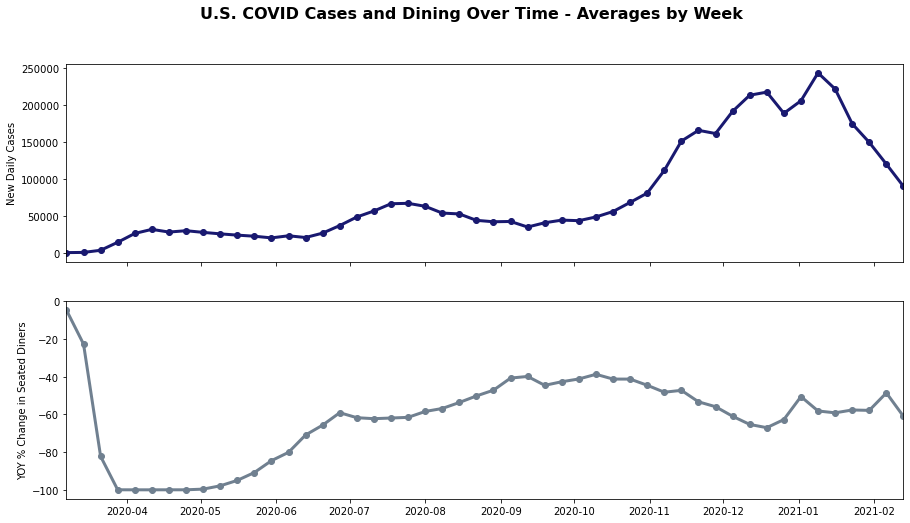

In [97]:
# Generate a facet plot of both figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 8))
fig.suptitle("U.S. COVID Cases and Dining Over Time - Averages by Week", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=3,marker="o",color = 'midnightblue')
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=3, marker="o", color="slategrey")
ax2.set_ylabel("YOY % Change in Seated Diners")

fig.savefig("output_images/U.S. COVID Cases and Dining Over Time - Averages by Week.png")

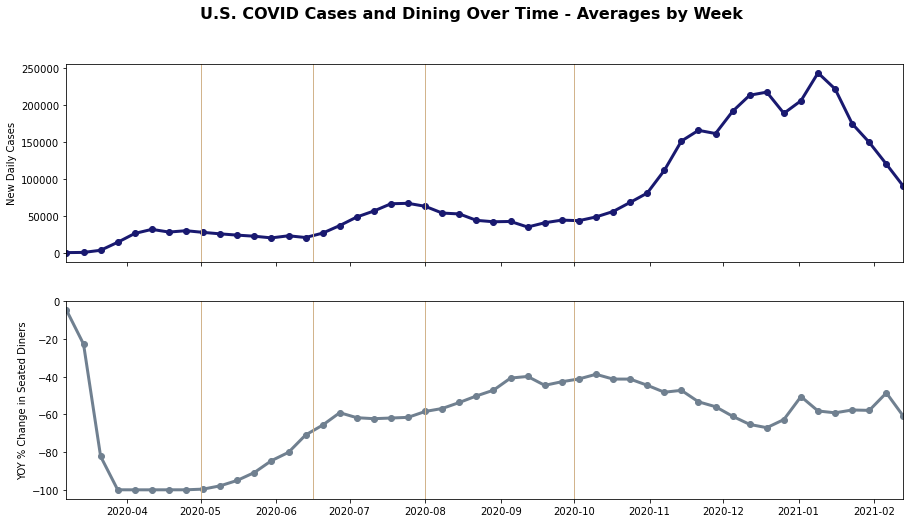

In [98]:
# create a separate saved figure with lines (wanted to keep code to keep track of both)

# create variables for data lists
cases = grouped_weeks['New Cases']
date =  grouped_weeks['Week']
diners = grouped_weeks['Percent Change in Seated Diners']

# Generate a facet plot of all 3 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 8))
fig.suptitle("U.S. COVID Cases and Dining Over Time - Averages by Week", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=3,marker="o",color = 'midnightblue')
ax1.axvline(x=datetime(2020, 5, 1), linewidth=1, color = "tan")
ax1.axvline(x=datetime(2020, 6, 16), linewidth=1, color = "tan")
ax1.axvline(x=datetime(2020, 8, 1), linewidth=1, color = "tan")
ax1.axvline(x=datetime(2020, 10, 1), linewidth=1, color = "tan")
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=3, marker="o", color="slategrey")
ax2.axvline(x=datetime(2020, 5, 1), linewidth=1, color = "tan")
ax2.axvline(x=datetime(2020, 6, 16), linewidth=1, color = "tan")
ax2.axvline(x=datetime(2020, 8, 1), linewidth=1, color = "tan")
ax2.axvline(x=datetime(2020, 10, 1), linewidth=1, color = "tan")
ax2.set_ylabel("YOY % Change in Seated Diners")

fig.savefig("output_images/U.S. COVID Cases and Dining Over Time - Averages by Week with Lines.png")

In [14]:
# did the below to try to make a more trend oriented case measure (to better account for cases being so low in Spring vs. now -- to better capture the ups and downs)
# ultimately didn't use it since slicing the visual seemed to be a better way to measure correlation

# create measures/columns to show trends for both metrics

trend_df = final_combined_df

daily_change = []

# populate values in new columns
for index,row in trend_df.iterrows():

    # create exception to avoid dividing by zero in the first row
    if index == 0:

        daily_change.append(0)
    
    # else, do the division
    else:
    
        yesterday = index - 1
    
        iter_value = ((trend_df.loc[index, "7-Day Moving Avg Cases"]/trend_df.loc[yesterday, "7-Day Moving Avg Cases"])-1)*100
    
        iter_percent = "{:.2}".format(iter_value)
        
        daily_change.append(iter_percent)   

# populate column and reformat as float
trend_df['Change in 7-Day Moving Avg Cases'] = daily_change

trend_df["Change in 7-Day Moving Avg Cases"] = trend_df["Change in 7-Day Moving Avg Cases"].astype(float)

trend_df.dtypes

Date                                datetime64[ns]
New Cases                                    int64
7-Day Moving Avg Cases                       int64
Percent Change in Seated Diners            float64
Change in 7-Day Moving Avg Cases           float64
dtype: object

In [15]:
# redo the correlation -- and get result that the correlation is still low 
trend_cases = trend_df['Change in 7-Day Moving Avg Cases']
trend_diners = trend_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(trend_cases, trend_diners)

tot_r

0.18444075810652183

In [51]:
# create separate dataframes for separate months -- get 'slices' to see a better correlation

#date_index_df = trend_df.set_index(['Date'])

# create a new df to have the week as index
date_index_df = grouped_weeks.set_index(['Week'])


# create slices of the data based on the story of the two data sets
spring_df = date_index_df.loc['2020-5-01':'2020-6-15']

summer_df = date_index_df.loc['2020-6-16':'2020-7-31']

fall_df = date_index_df.loc['2020-8-01':'2020-9-30']

holiday_df = date_index_df.loc['2020-10-01':'2020-12-31']

# example df
holiday_df


,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners
Week,,,
2020-10-03,43307.285714,42907.285714,-41.214286
2020-10-10,48354.000000,45698.714286,-38.744286
2020-10-17,55697.857143,52906.428571,-41.278571
2020-10-24,68039.285714,61023.857143,-41.285714
2020-10-31,80706.000000,75342.142857,-44.550000
2020-11-07,111387.000000,101622.285714,-48.247143
2020-11-14,151134.142857,125616.571429,-47.244286
2020-11-21,165722.000000,160640.000000,-53.328571
2020-11-28,161360.714286,170679.428571,-55.927143


In [89]:
#calculate the correlation of the selection
spring_cases = spring_df['New Cases']
spring_diners = spring_df['Percent Change in Seated Diners']

spr_slope, spr_int, spr_r, spr_p, spr_std_err = stats.linregress(spring_cases, spring_diners)

spr_r

-0.8008937503562156

In [90]:
#calculate the correlation of the selection
summer_cases = summer_df['New Cases']
summer_diners = summer_df['Percent Change in Seated Diners']

sum_slope, sum_int, sum_r, sum_p, sum_std_err = stats.linregress(summer_cases, summer_diners)

sum_r

0.3164923311722012

In [91]:
#calculate the correlation of the selection
fall_cases = fall_df['New Cases']
fall_diners = fall_df['Percent Change in Seated Diners']

fall_slope, fall_int, fall_r, fall_p, fall_std_err = stats.linregress(fall_cases, fall_diners)

fall_r

-0.903301172555877

In [92]:
#calculate the correlation of the selection
holiday_cases = holiday_df['New Cases']
holiday_diners = holiday_df['Percent Change in Seated Diners']

hol_slope, hol_int, hol_r, hol_p, hol_std_err = stats.linregress(holiday_cases, holiday_diners)

hol_r

-0.9623868247657725